# pandas(4) 计量经济学中的常用数据及变量类型的pandas处理方法

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#数据类型" data-toc-modified-id="数据类型-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>数据类型</a></span><ul class="toc-item"><li><span><a href="#截面数据(Cross-sectional-data)" data-toc-modified-id="截面数据(Cross-sectional-data)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>截面数据(Cross-sectional data)</a></span></li><li><span><a href="#时间序列数据-(Time-series-data)" data-toc-modified-id="时间序列数据-(Time-series-data)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>时间序列数据 (Time series data)</a></span><ul class="toc-item"><li><span><a href="#将已有字符串转换成日期类型数据，使用pandas.to_datetime" data-toc-modified-id="将已有字符串转换成日期类型数据，使用pandas.to_datetime-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>将已有字符串转换成日期类型数据，使用pandas.to_datetime</a></span></li><li><span><a href="#自建一个日期类型的数据-pandas.date_range" data-toc-modified-id="自建一个日期类型的数据-pandas.date_range-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>自建一个日期类型的数据 pandas.date_range</a></span></li><li><span><a href="#将原数据转化为时间序列数据" data-toc-modified-id="将原数据转化为时间序列数据-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>将原数据转化为时间序列数据</a></span></li><li><span><a href="#时间序列数据用于作图" data-toc-modified-id="时间序列数据用于作图-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>时间序列数据用于作图</a></span></li><li><span><a href="#时间序列数据用于数据调用" data-toc-modified-id="时间序列数据用于数据调用-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>时间序列数据用于数据调用</a></span></li><li><span><a href="#时间序列数据resample" data-toc-modified-id="时间序列数据resample-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>时间序列数据resample</a></span></li></ul></li><li><span><a href="#面板数据-（Panel-data）" data-toc-modified-id="面板数据-（Panel-data）-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>面板数据 （Panel data）</a></span><ul class="toc-item"><li><span><a href="#Case1：将住宅投资额转变为panel-data" data-toc-modified-id="Case1：将住宅投资额转变为panel-data-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Case1：将住宅投资额转变为panel data</a></span></li><li><span><a href="#Case2：将商品住宅施工面积读取为panel-data" data-toc-modified-id="Case2：将商品住宅施工面积读取为panel-data-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Case2：将商品住宅施工面积读取为panel data</a></span></li><li><span><a href="#Case3.将上边两个panel-data合并为panel-data集" data-toc-modified-id="Case3.将上边两个panel-data合并为panel-data集-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Case3.将上边两个panel data合并为panel data集</a></span></li></ul></li></ul></li><li><span><a href="#变量类型" data-toc-modified-id="变量类型-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>变量类型</a></span><ul class="toc-item"><li><span><a href="#哑变量" data-toc-modified-id="哑变量-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>哑变量</a></span></li><li><span><a href="#连续变量离散化" data-toc-modified-id="连续变量离散化-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>连续变量离散化</a></span><ul class="toc-item"><li><span><a href="#等宽法-pandas.cut()" data-toc-modified-id="等宽法-pandas.cut()-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>等宽法 pandas.cut()</a></span></li><li><span><a href="#等频法-pandas.qcut()" data-toc-modified-id="等频法-pandas.qcut()-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>等频法 pandas.qcut()</a></span></li></ul></li></ul></li><li><span><a href="#作业2/2" data-toc-modified-id="作业2/2-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>作业</a></span></li>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

## 数据类型

### 截面数据(Cross-sectional data)

横截面数据是指在某一时点收集的不同对象的数据。它对应同一时点上不同空间(对象)所组成的一维数据集合，研究的是某一时点上的某种经济现象，突出空间 (对象)的差异。横截面数据的突出特点就是离散性高。横截面数据体现的是个体的个性，突出个体的差异，通常横截面数据表现的是无规律的而非真正的随机变化。即计量经济学中所谓的“无法观测的异质性”。

**举例**
2018年中国31个省的GDP数据。（之前的课已经多次演示过）

In [2]:
gdp=pd.read_csv('GDP.csv',encoding='gbk')
gdp

,北京市,天津市,河北省,山西省,内蒙古自治区,辽宁省,吉林省,黑龙江省,上海市,江苏省,...,重庆市,四川省,贵州省,云南省,西藏自治区,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔自治区
0,30319.98,18809.64,36010.27,16818.11,17289.22,25315.35,15074.62,16361.62,32679.87,92595.4,...,20363.19,40678.13,14806.45,17881.12,1477.63,24438.32,8246.07,2865.23,3705.18,12199.08


In [3]:
gdp=gdp.iloc[0,]  #读取名为0的行，转换为Series数据
gdp

北京市         30319.98
天津市         18809.64
河北省         36010.27
山西省         16818.11
内蒙古自治区      17289.22
辽宁省         25315.35
吉林省         15074.62
黑龙江省        16361.62
上海市         32679.87
江苏省         92595.40
浙江省         56197.15
安徽省         30006.82
福建省         35804.04
江西省         21984.78
山东省         76469.67
河南省         48055.86
湖北省         39366.55
湖南省         36425.78
广东省         97277.77
广西壮族自治区     20352.51
海南省          4832.05
重庆市         20363.19
四川省         40678.13
贵州省         14806.45
云南省         17881.12
西藏自治区        1477.63
陕西省         24438.32
甘肃省          8246.07
青海省          2865.23
宁夏回族自治区      3705.18
新疆维吾尔自治区    12199.08
Name: 0, dtype: float64

In [4]:
type(gdp)

pandas.core.series.Series

以上GDP都是2018年的数据，是一组截面数据。

如果各个省份的数据是**不同年份的**，则**不是截面数据**。

### 时间序列数据 (Time series data)

时间数列是指将某一现象所发生的数量变化，依时间的先后顺序排列，以揭示随着时间的推移，这一现象的发展规律，从而用以预测现象发展的方向及其数量。

时间序列即一列均匀分布（每周、每月、每季等等）的数据点。分析时间序列意味着将过去数据分成几部分然后用之于外推。

**在使用计量经济学等方法进行时间序列数据的分析时，需要让计算机识别该数据是时间序列数据**。

**举例** 上次课作业使用的各省月住宅投资额

In [5]:
house_invest=pd.read_excel('各省月住宅投资额.xlsx')
house_invest

,日期,北京市,天津市,河北省,山西省,内蒙古自治区,辽宁省,吉林省,黑龙江省,上海市,...,重庆市,四川省,贵州省,云南省,西藏自治区,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔自治区
0,2020-2-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-1-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-12-1,171.43,142.45,191.60,109.25,12.95,50.11,39.97,32.68,249.35,...,285.91,397.15,127.23,343.00,3.95,281.94,57.29,7.93,14.64,31.25
3,2019-11-1,190.33,111.18,278.61,107.20,66.41,124.86,70.39,56.98,218.07,...,276.32,389.28,219.37,333.60,14.76,279.19,87.57,40.11,22.34,93.12
4,2019-10-1,192.06,120.02,288.08,120.29,76.49,184.05,123.38,75.77,196.29,...,268.78,434.32,190.85,260.84,14.84,291.46,96.10,39.04,30.50,130.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2000-5-1,20.76,6.53,7.06,2.42,2.64,17.85,2.41,5.19,24.34,...,5.32,9.03,1.49,3.55,0.00,2.87,1.75,0.68,1.04,2.98
238,2000-4-1,20.24,6.52,5.27,1.55,1.07,8.89,0.98,2.61,24.97,...,3.78,8.53,1.72,2.39,0.00,3.12,0.71,0.65,0.77,3.35
239,2000-3-1,15.77,6.86,4.69,0.39,0.01,3.27,0.00,0.45,31.77,...,4.29,8.37,1.21,4.40,0.00,3.16,0.48,0.90,0.08,0.59
240,2000-2-1,12.55,3.75,0.61,0.52,0.00,0.72,0.00,0.25,19.18,...,6.08,6.01,1.63,4.92,0.00,1.73,0.02,0.00,0.00,0.00


In [6]:
type(house_invest['日期'][0])

str

In [7]:
tianjin=house_invest['天津市']  #取天津市的一列数据
tianjin

0         NaN
1         NaN
2      142.45
3      111.18
4      120.02
        ...  
237      6.53
238      6.52
239      6.86
240      3.75
241       NaN
Name: 天津市, Length: 242, dtype: float64

In [8]:
tianjin.index=house_invest['日期'] #将日期列作为tianjin的index
tianjin

日期
2020-2-1        NaN
2020-1-1        NaN
2019-12-1    142.45
2019-11-1    111.18
2019-10-1    120.02
              ...  
2000-5-1       6.53
2000-4-1       6.52
2000-3-1       6.86
2000-2-1       3.75
2000-1-1        NaN
Name: 天津市, Length: 242, dtype: float64

<AxesSubplot:xlabel='日期'>

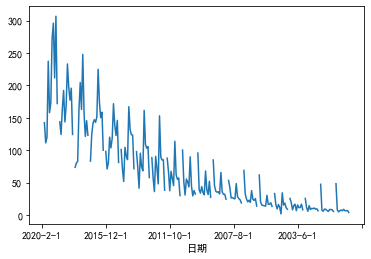

In [9]:
tianjin.plot()

In [10]:
type(tianjin.index[0])

str

可以看出，这个index是作为字符串类型操作的

In [11]:
tianjin.index[0]-tianjin.index[1]  #目前只是字符串，不能做减法运算

TypeError: unsupported operand type(s) for -: 'str' and 'str'

#### 将已有字符串转换成日期类型数据，使用pandas.to_datetime

In [12]:
dt = pd.to_datetime(house_invest['日期'], format="%Y-%m-%d") 
dt

0     2020-02-01
1     2020-01-01
2     2019-12-01
3     2019-11-01
4     2019-10-01
         ...    
237   2000-05-01
238   2000-04-01
239   2000-03-01
240   2000-02-01
241   2000-01-01
Name: 日期, Length: 242, dtype: datetime64[ns]

In [15]:
dt[2]-dt[3]  #转成日期类型后可以按日期计算

Timedelta('30 days 00:00:00')

#### 自建一个日期类型的数据 pandas.date_range

In [17]:
dt1 = pd.date_range(start="20000101", end="20200201", freq="MS")
dt1

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01'],
              dtype='datetime64[ns]', length=242, freq='MS')

date_range中，freq属性可以接收的参数。还有Y 年的结尾 YS 年的开始
![data_range中，freq属性可以接收的参数](data_freq.jpg)

可以和python的range功能，numpy.arange等类似

#### 将原数据转化为时间序列数据

In [18]:
beijing=house_invest['北京市']
beijing

0         NaN
1         NaN
2      171.43
3      190.33
4      192.06
        ...  
237     20.76
238     20.24
239     15.77
240     12.55
241       NaN
Name: 北京市, Length: 242, dtype: float64

可以给其添加日期作为index

In [19]:
beijing.index=dt1
beijing.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01'],
              dtype='datetime64[ns]', length=242, freq='MS')

In [20]:
beijing.index=dt
beijing.index

DatetimeIndex(['2020-02-01', '2020-01-01', '2019-12-01', '2019-11-01',
               '2019-10-01', '2019-09-01', '2019-08-01', '2019-07-01',
               '2019-06-01', '2019-05-01',
               ...
               '2000-10-01', '2000-09-01', '2000-08-01', '2000-07-01',
               '2000-06-01', '2000-05-01', '2000-04-01', '2000-03-01',
               '2000-02-01', '2000-01-01'],
              dtype='datetime64[ns]', name='日期', length=242, freq=None)

上边两种index的区别在于freq是否有值

#### 时间序列数据用于作图

<AxesSubplot:xlabel='日期'>

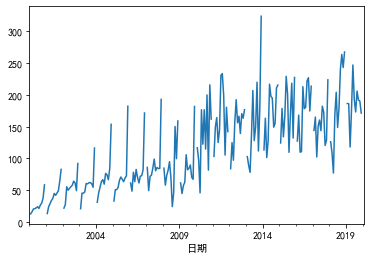

In [21]:
beijing.plot()

<AxesSubplot:xlabel='日期'>

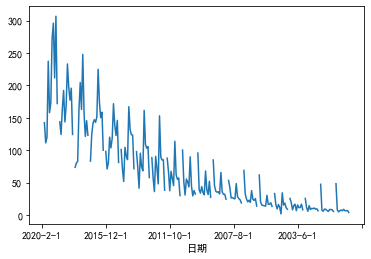

In [22]:
tianjin.plot()

**通过对比可以看出，时间序列数据作图时，会自动从较早的时间开始画**

In [23]:
date=[201904,200801,200203,201507,202001,201009]
example=pd.Series(np.random.rand(len(date)),index=date)
example

201904    0.083431
200801    0.846054
200203    0.158937
201507    0.719550
202001    0.117130
201009    0.795486
dtype: float64

<AxesSubplot:>

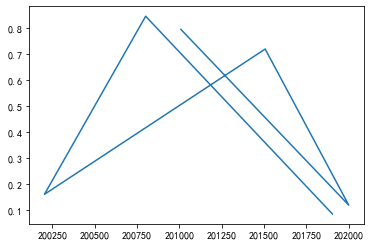

In [24]:
example.plot()

In [25]:
example.index=pd.to_datetime(example.index, format="%Y%m") 

In [26]:
example.index

DatetimeIndex(['2019-04-01', '2008-01-01', '2002-03-01', '2015-07-01',
               '2020-01-01', '2010-09-01'],
              dtype='datetime64[ns]', freq=None)

<AxesSubplot:>

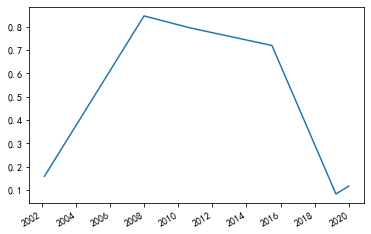

In [27]:
example.plot()

**通过上面例子可以看出，即使数据中时间的顺序是乱序的，作图时也会按顺序绘制**

#### 时间序列数据用于数据调用

In [28]:
beijing

日期
2020-02-01       NaN
2020-01-01       NaN
2019-12-01    171.43
2019-11-01    190.33
2019-10-01    192.06
               ...  
2000-05-01     20.76
2000-04-01     20.24
2000-03-01     15.77
2000-02-01     12.55
2000-01-01       NaN
Name: 北京市, Length: 242, dtype: float64

In [29]:
beijing['2015']

日期
2015-12-01    227.57
2015-11-01    132.07
2015-10-01    218.43
2015-09-01    168.27
2015-08-01    109.61
2015-07-01    200.67
2015-06-01    229.25
2015-05-01    166.60
2015-04-01    134.00
2015-03-01    178.77
2015-02-01    124.30
2015-01-01       NaN
Name: 北京市, dtype: float64

In [30]:
beijing['2017-07']

日期
2017-07-01    143.72
Name: 北京市, dtype: float64

In [33]:
beijing['2018':'2010']  ##可以切片

日期
2018-12-01    267.61
2018-11-01    243.19
2018-10-01    263.82
2018-09-01    240.07
2018-08-01    178.86
               ...  
2010-05-01    176.63
2010-04-01     45.66
2010-03-01     96.89
2010-02-01    116.78
2010-01-01       NaN
Name: 北京市, Length: 108, dtype: float64

**切片时注意顺序冒号左右两个index的顺序，不是按时间的顺序，而是按其在series中排位的先后**

In [34]:
beijing['2010':'2018']  ##否则切片结果为空

Series([], Name: 北京市, dtype: float64)

#### 时间序列数据resample

In [39]:
beijing['2000']

日期
2000-12-01    58.35
2000-11-01    37.59
2000-10-01    29.56
2000-09-01    26.41
2000-08-01    21.08
2000-07-01    23.91
2000-06-01    22.04
2000-05-01    20.76
2000-04-01    20.24
2000-03-01    15.77
2000-02-01    12.55
2000-01-01      NaN
Name: 北京市, dtype: float64

In [37]:
beijing.resample('YS').sum()
#YS表示年的开始（1月1日），Y表示年的末尾(12月31日),但统计的内容时一样的

日期
2000-01-01     288.26
2001-01-01     464.22
2002-01-01     586.74
2003-01-01     632.97
2004-01-01     775.99
2005-01-01     779.53
2006-01-01     863.62
2007-01-01     991.66
2008-01-01     940.56
2009-01-01     906.62
2010-01-01    1508.95
2011-01-01    1778.31
2012-01-01    1627.99
2013-01-01    1724.56
2014-01-01    1846.08
2015-01-01    1889.54
2016-01-01    1925.86
2017-01-01    1694.67
2018-01-01    2026.06
2019-01-01    2039.76
2020-01-01       0.00
Freq: AS-JAN, Name: 北京市, dtype: float64

In [40]:
beijing.resample('3YS').sum()  #可以添加整数，表示多少年、多少月

日期
2000-01-01    1339.22
2003-01-01    2188.49
2006-01-01    2795.84
2009-01-01    4193.88
2012-01-01    5198.63
2015-01-01    5510.07
2018-01-01    4065.82
Freq: 3AS-JAN, Name: 北京市, dtype: float64

In [41]:
beijing.resample('3MS').sum()  #每3个月

日期
2000-01-01     28.32
2000-04-01     63.04
2000-07-01     71.40
2000-10-01    125.50
2001-01-01     36.98
               ...  
2019-01-01    372.67
2019-04-01    541.23
2019-07-01    572.04
2019-10-01    553.82
2020-01-01      0.00
Freq: 3MS, Name: 北京市, Length: 81, dtype: float64

In [45]:
beijing.resample('D').sum()['2020-01']

日期
2020-01-01    0.0
2020-01-02    0.0
2020-01-03    0.0
2020-01-04    0.0
2020-01-05    0.0
2020-01-06    0.0
2020-01-07    0.0
2020-01-08    0.0
2020-01-09    0.0
2020-01-10    0.0
2020-01-11    0.0
2020-01-12    0.0
2020-01-13    0.0
2020-01-14    0.0
2020-01-15    0.0
2020-01-16    0.0
2020-01-17    0.0
2020-01-18    0.0
2020-01-19    0.0
2020-01-20    0.0
2020-01-21    0.0
2020-01-22    0.0
2020-01-23    0.0
2020-01-24    0.0
2020-01-25    0.0
2020-01-26    0.0
2020-01-27    0.0
2020-01-28    0.0
2020-01-29    0.0
2020-01-30    0.0
2020-01-31    0.0
Freq: D, Name: 北京市, dtype: float64

###  面板数据 （Panel data）

   面板数据是指在时间序列上取多个截面，在这些截面上同时选取样本观测值所构成的样本数据。

   其有**时间序列和截面两个维度**，当这类数据按两个维度排列时，是排在一个平面上，与只有一个维度的数据排在一条线上有着明显的不同，整个表格像是一个面板，所以把panel data译作“面板数据”。但是，如果从其内在含义上讲，把panel data译为“时间序列—截面数据”（Time Series - Cross Section）更能揭示这类数据的本质上的特点。

#### Case1：将住宅投资额转变为panel data

In [46]:
house_invest

,日期,北京市,天津市,河北省,山西省,内蒙古自治区,辽宁省,吉林省,黑龙江省,上海市,...,重庆市,四川省,贵州省,云南省,西藏自治区,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔自治区
0,2020-2-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-1-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-12-1,171.43,142.45,191.60,109.25,12.95,50.11,39.97,32.68,249.35,...,285.91,397.15,127.23,343.00,3.95,281.94,57.29,7.93,14.64,31.25
3,2019-11-1,190.33,111.18,278.61,107.20,66.41,124.86,70.39,56.98,218.07,...,276.32,389.28,219.37,333.60,14.76,279.19,87.57,40.11,22.34,93.12
4,2019-10-1,192.06,120.02,288.08,120.29,76.49,184.05,123.38,75.77,196.29,...,268.78,434.32,190.85,260.84,14.84,291.46,96.10,39.04,30.50,130.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2000-5-1,20.76,6.53,7.06,2.42,2.64,17.85,2.41,5.19,24.34,...,5.32,9.03,1.49,3.55,0.00,2.87,1.75,0.68,1.04,2.98
238,2000-4-1,20.24,6.52,5.27,1.55,1.07,8.89,0.98,2.61,24.97,...,3.78,8.53,1.72,2.39,0.00,3.12,0.71,0.65,0.77,3.35
239,2000-3-1,15.77,6.86,4.69,0.39,0.01,3.27,0.00,0.45,31.77,...,4.29,8.37,1.21,4.40,0.00,3.16,0.48,0.90,0.08,0.59
240,2000-2-1,12.55,3.75,0.61,0.52,0.00,0.72,0.00,0.25,19.18,...,6.08,6.01,1.63,4.92,0.00,1.73,0.02,0.00,0.00,0.00


In [48]:
house_invest.index=house_invest['日期']
print(type(house_invest.index))

<class 'pandas.core.indexes.base.Index'>


In [49]:
house_invest.head()

,日期,北京市,天津市,河北省,山西省,内蒙古自治区,辽宁省,吉林省,黑龙江省,上海市,...,重庆市,四川省,贵州省,云南省,西藏自治区,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔自治区
日期,,,,,,,,,,,,,,,,,,,,,
2020-2-1,2020-2-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-1-1,2020-1-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-1,2019-12-1,171.43,142.45,191.60,109.25,12.95,50.11,39.97,32.68,249.35,...,285.91,397.15,127.23,343.00,3.95,281.94,57.29,7.93,14.64,31.25
2019-11-1,2019-11-1,190.33,111.18,278.61,107.20,66.41,124.86,70.39,56.98,218.07,...,276.32,389.28,219.37,333.60,14.76,279.19,87.57,40.11,22.34,93.12
2019-10-1,2019-10-1,192.06,120.02,288.08,120.29,76.49,184.05,123.38,75.77,196.29,...,268.78,434.32,190.85,260.84,14.84,291.46,96.10,39.04,30.50,130.12


**我们将其日期列转成index，需要注意的是，此时日期列只是普通的文本，并不是日期数据类型。**

In [52]:
house_invest.loc['2020-2-1']

日期          2020-2-1
北京市              NaN
天津市              NaN
河北省              NaN
山西省              NaN
内蒙古自治区           NaN
辽宁省              NaN
吉林省              NaN
黑龙江省             NaN
上海市              NaN
江苏省              NaN
浙江省              NaN
安徽省              NaN
福建省              NaN
江西省              NaN
山东省              NaN
河南省              NaN
湖北省              NaN
湖南省              NaN
广东省              NaN
广西壮族自治区          NaN
海南省              NaN
重庆市              NaN
四川省              NaN
贵州省              NaN
云南省              NaN
西藏自治区            NaN
陕西省              NaN
甘肃省              NaN
青海省              NaN
宁夏回族自治区          NaN
新疆维吾尔自治区         NaN
Name: 2020-2-1, dtype: object

**上面报错可见普通的index下，dataframe不能通过用时间行名来索引得到！**

In [53]:
dt

0     2020-02-01
1     2020-01-01
2     2019-12-01
3     2019-11-01
4     2019-10-01
         ...    
237   2000-05-01
238   2000-04-01
239   2000-03-01
240   2000-02-01
241   2000-01-01
Name: 日期, Length: 242, dtype: datetime64[ns]

In [54]:
house_invest.index=dt

In [55]:
house_invest.drop('日期',axis=1,inplace=True)

In [56]:
house_invest

,北京市,天津市,河北省,山西省,内蒙古自治区,辽宁省,吉林省,黑龙江省,上海市,江苏省,...,重庆市,四川省,贵州省,云南省,西藏自治区,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔自治区
日期,,,,,,,,,,,,,,,,,,,,,
2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-01,171.43,142.45,191.60,109.25,12.95,50.11,39.97,32.68,249.35,629.71,...,285.91,397.15,127.23,343.00,3.95,281.94,57.29,7.93,14.64,31.25
2019-11-01,190.33,111.18,278.61,107.20,66.41,124.86,70.39,56.98,218.07,783.04,...,276.32,389.28,219.37,333.60,14.76,279.19,87.57,40.11,22.34,93.12
2019-10-01,192.06,120.02,288.08,120.29,76.49,184.05,123.38,75.77,196.29,791.58,...,268.78,434.32,190.85,260.84,14.84,291.46,96.10,39.04,30.50,130.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000-05-01,20.76,6.53,7.06,2.42,2.64,17.85,2.41,5.19,24.34,21.74,...,5.32,9.03,1.49,3.55,0.00,2.87,1.75,0.68,1.04,2.98
2000-04-01,20.24,6.52,5.27,1.55,1.07,8.89,0.98,2.61,24.97,18.90,...,3.78,8.53,1.72,2.39,0.00,3.12,0.71,0.65,0.77,3.35
2000-03-01,15.77,6.86,4.69,0.39,0.01,3.27,0.00,0.45,31.77,17.76,...,4.29,8.37,1.21,4.40,0.00,3.16,0.48,0.90,0.08,0.59


以上，我们用之前转化的日期数据作为新的index

In [57]:
house_invest['2019']

AssertionError: <class 'numpy.ndarray'>

**时间序列作为index的好处在panel data（dataframe格式）中也得到了继承**

注意：得用.loc，不用的话较新版本的pandas会报错

In [58]:
house_invest.loc['2019']

,北京市,天津市,河北省,山西省,内蒙古自治区,辽宁省,吉林省,黑龙江省,上海市,江苏省,...,重庆市,四川省,贵州省,云南省,西藏自治区,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔自治区
日期,,,,,,,,,,,,,,,,,,,,,
2019-12-01,171.43,142.45,191.60,109.25,12.95,50.11,39.97,32.68,249.35,629.71,...,285.91,397.15,127.23,343.00,3.95,281.94,57.29,7.93,14.64,31.25
2019-11-01,190.33,111.18,278.61,107.20,66.41,124.86,70.39,56.98,218.07,783.04,...,276.32,389.28,219.37,333.60,14.76,279.19,87.57,40.11,22.34,93.12
2019-10-01,192.06,120.02,288.08,120.29,76.49,184.05,123.38,75.77,196.29,791.58,...,268.78,434.32,190.85,260.84,14.84,291.46,96.10,39.04,30.50,130.12
2019-09-01,206.05,237.32,347.07,133.73,135.73,265.94,132.02,123.92,223.27,867.43,...,359.03,468.02,186.86,322.51,11.68,354.99,132.00,28.19,41.60,107.08
2019-08-01,173.17,157.91,332.31,124.50,111.02,207.80,138.65,75.08,200.91,780.44,...,288.46,426.79,214.50,289.73,10.07,258.98,95.24,27.24,32.67,94.24
2019-07-01,192.82,173.08,362.01,119.21,115.35,205.44,108.05,71.25,191.61,836.14,...,236.33,374.24,174.26,225.23,12.28,232.88,85.52,38.39,34.30,99.63
2019-06-01,247.17,271.83,568.59,193.97,107.39,376.48,116.85,106.84,183.87,909.22,...,351.37,494.70,276.86,296.65,8.49,440.71,112.53,61.12,34.43,68.53
2019-05-01,176.13,296.11,330.69,136.81,72.79,224.89,150.47,79.81,178.59,899.29,...,300.85,400.08,165.29,235.14,12.10,242.95,76.30,25.74,22.95,51.73
2019-04-01,117.93,211.47,288.88,98.17,49.23,190.05,56.07,45.62,173.83,825.09,...,266.80,374.18,152.92,180.75,5.06,180.25,54.30,19.57,24.15,27.16


In [59]:
house_invest['北京市']['2019']

日期
2019-12-01    171.43
2019-11-01    190.33
2019-10-01    192.06
2019-09-01    206.05
2019-08-01    173.17
2019-07-01    192.82
2019-06-01    247.17
2019-05-01    176.13
2019-04-01    117.93
2019-03-01    186.13
2019-02-01    186.54
2019-01-01       NaN
Name: 北京市, dtype: float64

In [60]:
house_invest.loc['2019-02-01']

,北京市,天津市,河北省,山西省,内蒙古自治区,辽宁省,吉林省,黑龙江省,上海市,江苏省,...,重庆市,四川省,贵州省,云南省,西藏自治区,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔自治区
日期,,,,,,,,,,,,,,,,,,,,,
2019-02-01,186.54,171.94,136.89,47.49,3.52,103.26,9.16,1.6,333.96,1176.89,...,346.02,506.13,189.08,246.9,0.22,173.61,21.55,0.58,4.14,8.64


**可以发现，使用时间序列index，可以很轻松的在pannel data中切片出一个截面数据**

**还可以对时间切片，得到一个子panel data**

In [61]:
house_invest.loc['2013':'2012'] 
##注意切片时，冒号左边的要比冒号右边的行靠上，而不是代表的时间考前

,北京市,天津市,河北省,山西省,内蒙古自治区,辽宁省,吉林省,黑龙江省,上海市,江苏省,...,重庆市,四川省,贵州省,云南省,西藏自治区,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔自治区
日期,,,,,,,,,,,,,,,,,,,,,
2013-12-01,323.97,97.74,173.52,124.66,23.59,206.45,28.49,111.53,164.17,553.94,...,241.61,256.32,108.97,202.36,0.97,138.59,17.77,2.34,14.02,26.93
2013-11-01,178.44,73.17,257.99,109.79,72.88,364.80,140.40,115.39,169.68,514.60,...,199.79,221.17,112.34,127.63,0.36,227.59,49.84,11.57,36.58,67.34
2013-10-01,111.66,41.24,257.91,105.33,147.75,452.95,117.31,133.07,162.14,398.04,...,160.45,198.58,107.96,157.37,0.55,166.86,58.04,19.40,40.41,55.63
2013-09-01,220.09,95.28,280.66,111.49,166.35,679.64,144.54,153.62,159.04,440.50,...,191.92,230.70,129.28,182.14,0.62,157.99,77.61,26.90,48.13,82.56
2013-08-01,149.89,74.24,266.61,100.63,145.71,477.50,113.87,145.02,135.45,449.32,...,191.17,203.66,115.02,134.60,0.72,149.64,61.70,18.76,42.04,82.89
2013-07-01,128.03,68.14,215.57,90.96,119.38,523.07,112.87,131.55,99.36,442.35,...,157.65,222.70,106.33,129.10,0.78,159.05,60.23,27.86,44.01,74.65
2013-06-01,206.98,161.42,334.82,119.87,154.16,758.40,128.78,145.70,146.49,455.56,...,205.10,265.86,119.33,180.61,0.48,234.74,75.89,15.82,42.12,67.53
2013-05-01,136.09,108.79,221.38,83.51,95.16,545.15,70.62,106.26,130.68,454.36,...,164.81,229.37,108.47,142.28,0.51,165.17,56.35,14.54,31.66,50.45
2013-04-01,77.99,103.03,194.84,55.48,50.40,307.39,31.63,59.31,127.14,399.58,...,141.26,183.04,73.66,114.77,0.44,121.40,42.68,13.90,25.32,34.57


#### Case2：将商品住宅施工面积读取为panel data

In [62]:
house_construct=pd.read_excel('商品住宅施工面积.xlsx',index_col=0)
house_construct

,北京市,天津市,河北省,山西省,内蒙古自治区,辽宁省,吉林省,黑龙江省,上海市,江苏省,...,重庆市,四川省,贵州省,云南省,西藏自治区,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔自治区
日期,,,,,,,,,,,,,,,,,,,,,
2020-02-01,4957.06,6325.07,16225.79,11735.03,7026.44,14269.01,6634.71,6320.29,5856.01,38213.57,...,14533.99,23816.22,13734.27,12188.69,187.80,16212.77,4616.71,1257.09,2918.94,5953.52
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-01,5640.11,8156.94,23023.40,14323.76,10808.28,17429.59,8614.03,8216.36,7446.43,49010.85,...,18466.12,32151.96,18426.52,17531.69,549.81,20154.62,7473.29,1931.17,3789.29,8162.30
2019-11-01,5570.72,7808.73,22640.15,14084.02,10714.32,17378.53,8575.42,8106.51,7306.27,48470.12,...,18134.22,31345.69,17980.39,16550.38,541.37,19745.80,7297.90,1912.32,3751.28,8073.78
2019-10-01,5507.45,7700.64,21932.74,13709.88,10416.89,17165.78,8489.36,7945.65,7080.41,47242.90,...,17773.75,30569.84,17417.93,15988.13,521.82,19325.55,7158.51,1836.17,3686.74,7805.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000-05-01,1810.57,947.48,776.35,220.99,174.98,1072.13,150.46,382.08,2793.18,1976.48,...,999.64,1468.25,297.41,382.02,NaN,487.87,108.65,78.13,100.00,245.91
2000-04-01,1645.92,849.27,611.37,163.01,66.13,679.86,30.81,274.36,2603.22,1819.40,...,915.56,1364.69,247.75,363.20,NaN,449.30,86.54,69.13,68.00,167.15
2000-03-01,1393.97,790.47,412.52,49.77,7.40,273.84,NaN,80.01,2416.14,1586.83,...,847.61,1251.11,168.48,342.43,NaN,389.52,47.92,52.27,12.80,60.35


In [63]:
type(house_construct.index)

pandas.core.indexes.datetimes.DatetimeIndex

 **可见，pandas在读取数据时可以自动识别时间、日期数据，在其作为index时自动将其转化为DatetimeIndex**

#### Case3.将上边两个panel data合并为panel data集

In [64]:
house=pd.concat([house_invest,house_construct],axis=1,keys=['invest','construct'])  ##axis=1表示横向合并
house

invest                                                        \
               北京市     天津市     河北省     山西省 内蒙古自治区     辽宁省     吉林省   黑龙江省   
日期                                                                         
2020-02-01     NaN     NaN     NaN     NaN    NaN     NaN     NaN    NaN   
2020-01-01     NaN     NaN     NaN     NaN    NaN     NaN     NaN    NaN   
2019-12-01  171.43  142.45  191.60  109.25  12.95   50.11   39.97  32.68   
2019-11-01  190.33  111.18  278.61  107.20  66.41  124.86   70.39  56.98   
2019-10-01  192.06  120.02  288.08  120.29  76.49  184.05  123.38  75.77   
...            ...     ...     ...     ...    ...     ...     ...    ...   
2000-05-01   20.76    6.53    7.06    2.42   2.64   17.85    2.41   5.19   
2000-04-01   20.24    6.52    5.27    1.55   1.07    8.89    0.98   2.61   
2000-03-01   15.77    6.86    4.69    0.39   0.01    3.27    0.00   0.45   
2000-02-01   12.55    3.75    0.61    0.52   0.00    0.72    0.00   0.25   
2000-01-01     NaN     NaN     NaN     NaN    NaN     NaN     NaN    NaN   

                            ... construct                                \
               上海市     江苏省  ...       重庆市       四川省       贵州省       云南省   
日期                          ...                                           
2020-02-01     NaN     NaN  ...  14533.99  23816.22  13734.27  12188.69   
2020-01-01     NaN     NaN  ...       NaN       NaN       NaN       NaN   
2019-12-01  249.35  629.71  ...  18466.12  32151.96  18426.52  17531.69   
2019-11-01  218.07  783.04  ...  18134.22  31345.69  17980.39  16550.38   
2019-10-01  196.29  791.58  ...  17773.75  30569.84  17417.93  15988.13   
...            ...     ...  ...       ...       ...       ...       ...   
2000-05-01   24.34   21.74  ...    999.64   1468.25    297.41    382.02   
2000-04-01   24.97   18.90  ...    915.56   1364.69    247.75    363.20   
2000-03-01   31.77   17.76  ...    847.61   1251.11    168.48    342.43   
2000-02-01   19.18   16.84  ...    686.42    768.70    123.05    202.42   
2000-01-01     NaN     NaN  ...       NaN       NaN       NaN       NaN   

                                                                  
             西藏自治区       陕西省      甘肃省      青海省  宁夏回族自治区 新疆维吾尔自治区  
日期                                                                
2020-02-01  187.80  16212.77  4616.71  1257.09  2918.94  5953.52  
2020-01-01     NaN       NaN      NaN      NaN      NaN      NaN  
2019-12-01  549.81  20154.62  7473.29  1931.17  3789.29  8162.30  
2019-11-01  541.37  19745.80  7297.90  1912.32  3751.28  8073.78  
2019-10-01  521.82  19325.55  7158.51  1836.17  3686.74  7805.36  
...            ...       ...      ...      ...      ...      ...  
2000-05-01     NaN    487.87   108.65    78.13   100.00   245.91  
2000-04-01     NaN    449.30    86.54    69.13    68.00   167.15  
2000-03-01     NaN    389.52    47.92    52.27    12.80    60.35  
2000-02-01     NaN    104.25     4.10      NaN      NaN      NaN  
2000-01-01     NaN       NaN      NaN      NaN      NaN      NaN  

[242 rows x 62 columns]

In [65]:
house.loc['2018-12-01']

invest                                                            \
               北京市     天津市     河北省    山西省 内蒙古自治区   辽宁省    吉林省   黑龙江省     上海市   
日期                                                                             
2018-12-01  267.61  143.71  222.14  83.68   4.82  72.3  36.13  30.88  266.36   

                    ... construct                                       \
               江苏省  ...       重庆市      四川省       贵州省       云南省   西藏自治区   
日期                  ...                                                  
2018-12-01  503.46  ...  17859.42  28540.4  13985.42  14243.51  225.04   

                                                         
                 陕西省     甘肃省      青海省  宁夏回族自治区 新疆维吾尔自治区  
日期                                                       
2018-12-01  17479.71  6167.6  1582.56  3821.19  6884.37  

[1 rows x 62 columns]

横向合并后，列名转为了MultiIndex类型，而新的dataframe的index没有变，仍是合并前的时间序列，其使用方式得到保留。

In [66]:
house['invest']

,北京市,天津市,河北省,山西省,内蒙古自治区,辽宁省,吉林省,黑龙江省,上海市,江苏省,...,重庆市,四川省,贵州省,云南省,西藏自治区,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔自治区
日期,,,,,,,,,,,,,,,,,,,,,
2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-01,171.43,142.45,191.60,109.25,12.95,50.11,39.97,32.68,249.35,629.71,...,285.91,397.15,127.23,343.00,3.95,281.94,57.29,7.93,14.64,31.25
2019-11-01,190.33,111.18,278.61,107.20,66.41,124.86,70.39,56.98,218.07,783.04,...,276.32,389.28,219.37,333.60,14.76,279.19,87.57,40.11,22.34,93.12
2019-10-01,192.06,120.02,288.08,120.29,76.49,184.05,123.38,75.77,196.29,791.58,...,268.78,434.32,190.85,260.84,14.84,291.46,96.10,39.04,30.50,130.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000-05-01,20.76,6.53,7.06,2.42,2.64,17.85,2.41,5.19,24.34,21.74,...,5.32,9.03,1.49,3.55,0.00,2.87,1.75,0.68,1.04,2.98
2000-04-01,20.24,6.52,5.27,1.55,1.07,8.89,0.98,2.61,24.97,18.90,...,3.78,8.53,1.72,2.39,0.00,3.12,0.71,0.65,0.77,3.35
2000-03-01,15.77,6.86,4.69,0.39,0.01,3.27,0.00,0.45,31.77,17.76,...,4.29,8.37,1.21,4.40,0.00,3.16,0.48,0.90,0.08,0.59


同时，也可以直接的得到想要的部分数据

**纵向合并将不能直接通过时间获取数据**

In [67]:
house1=pd.concat([house_invest,house_construct],axis=0,keys=['invest','construct'])  ##axis=0表示纵向合并
house1

北京市     天津市     河北省     山西省  内蒙古自治区      辽宁省  \
          日期                                                             
invest    2020-02-01      NaN     NaN     NaN     NaN     NaN      NaN   
          2020-01-01      NaN     NaN     NaN     NaN     NaN      NaN   
          2019-12-01   171.43  142.45  191.60  109.25   12.95    50.11   
          2019-11-01   190.33  111.18  278.61  107.20   66.41   124.86   
          2019-10-01   192.06  120.02  288.08  120.29   76.49   184.05   
...                       ...     ...     ...     ...     ...      ...   
construct 2000-05-01  1810.57  947.48  776.35  220.99  174.98  1072.13   
          2000-04-01  1645.92  849.27  611.37  163.01   66.13   679.86   
          2000-03-01  1393.97  790.47  412.52   49.77    7.40   273.84   
          2000-02-01   972.92  384.15  113.71   38.10     NaN    56.12   
          2000-01-01      NaN     NaN     NaN     NaN     NaN      NaN   

                         吉林省    黑龙江省      上海市      江苏省  ...     重庆市      四川省  \
          日期                                            ...                    
invest    2020-02-01     NaN     NaN      NaN      NaN  ...     NaN      NaN   
          2020-01-01     NaN     NaN      NaN      NaN  ...     NaN      NaN   
          2019-12-01   39.97   32.68   249.35   629.71  ...  285.91   397.15   
          2019-11-01   70.39   56.98   218.07   783.04  ...  276.32   389.28   
          2019-10-01  123.38   75.77   196.29   791.58  ...  268.78   434.32   
...                      ...     ...      ...      ...  ...     ...      ...   
construct 2000-05-01  150.46  382.08  2793.18  1976.48  ...  999.64  1468.25   
          2000-04-01   30.81  274.36  2603.22  1819.40  ...  915.56  1364.69   
          2000-03-01     NaN   80.01  2416.14  1586.83  ...  847.61  1251.11   
          2000-02-01     NaN    8.81  1788.51  1084.36  ...  686.42   768.70   
          2000-01-01     NaN     NaN      NaN      NaN  ...     NaN      NaN   

                         贵州省     云南省  西藏自治区     陕西省     甘肃省    青海省  宁夏回族自治区  \
          日期                                                                  
invest    2020-02-01     NaN     NaN    NaN     NaN     NaN    NaN      NaN   
          2020-01-01     NaN     NaN    NaN     NaN     NaN    NaN      NaN   
          2019-12-01  127.23  343.00   3.95  281.94   57.29   7.93    14.64   
          2019-11-01  219.37  333.60  14.76  279.19   87.57  40.11    22.34   
          2019-10-01  190.85  260.84  14.84  291.46   96.10  39.04    30.50   
...                      ...     ...    ...     ...     ...    ...      ...   
construct 2000-05-01  297.41  382.02    NaN  487.87  108.65  78.13   100.00   
          2000-04-01  247.75  363.20    NaN  449.30   86.54  69.13    68.00   
          2000-03-01  168.48  342.43    NaN  389.52   47.92  52.27    12.80   
          2000-02-01  123.05  202.42    NaN  104.25    4.10    NaN      NaN   
          2000-01-01     NaN     NaN    NaN     NaN     NaN    NaN      NaN   

                      新疆维吾尔自治区  
          日期                    
invest    2020-02-01       NaN  
          2020-01-01       NaN  
          2019-12-01     31.25  
          2019-11-01     93.12  
          2019-10-01    130.12  
...                        ...  
construct 2000-05-01    245.91  
          2000-04-01    167.15  
          2000-03-01     60.35  
          2000-02-01       NaN  
          2000-01-01       NaN  

[484 rows x 31 columns]

In [68]:
house1.loc[('invest','2018-02-01')]  ##使用loc，配合multiindex才可以调用，非常麻烦

北京市          126.25
天津市          124.22
河北省          159.36
山西省           36.48
内蒙古自治区         5.06
辽宁省           86.13
吉林省            8.19
黑龙江省           1.20
上海市          321.18
江苏省         1090.29
浙江省          657.96
安徽省          481.47
福建省          368.71
江西省          154.43
山东省          453.48
河南省          379.83
湖北省          280.78
湖南省          217.11
广东省          923.12
广西壮族自治区      172.74
海南省          177.61
重庆市          259.22
四川省          412.21
贵州省          146.36
云南省          167.77
西藏自治区          0.01
陕西省          141.41
甘肃省           16.60
青海省            0.66
宁夏回族自治区        1.94
新疆维吾尔自治区       7.65
Name: (invest, 2018-02-01 00:00:00), dtype: float64

In [69]:
house1.loc['2020']  ##不能使用

KeyError: '2020'

**因此多组panel data的合并推荐选择横向合并保留时间序列为单独的index！**

## 变量类型

### 哑变量

哑变量（Dummy Variable），也叫虚拟变量，引入哑变量的目的是，将不能够定量处理的变量量化，如职业、性别对收入的影响，战争、自然灾害对GDP的影响，季节对某些产品（如冷饮）销售的影响等等。 这种“量化”通常是通过引入“哑变量”来完成的。根据这些因素的属性类型，构造只取“0”或“1”的人工变量，通常称为哑变量（dummy variables）。

In [70]:
df = pd.DataFrame({ '性别': ['男', '女', '男'],'国籍':['中国','英国','法国'],'粉丝数':[140,200,300]},index=['张三', '李四', '王五'])
df

,性别,国籍,粉丝数
张三,男,中国,140
李四,女,英国,200
王五,男,法国,300


In [71]:
pd.get_dummies(df,columns=['国籍'])  #columns可以输入想要做dummy的数据列名

,性别,粉丝数,国籍_中国,国籍_法国,国籍_英国
张三,男,140,1,0,0
李四,女,200,0,0,1
王五,男,300,0,1,0


In [72]:
pd.get_dummies(df)  #不指定列名的话，就给所有可以做的列做做dummy

,粉丝数,性别_女,性别_男,国籍_中国,国籍_法国,国籍_英国
张三,140,0,1,1,0,0
李四,200,1,0,0,0,1
王五,300,0,1,0,1,0


注意，默认情况下，是给非数据的列做dummy,想给数字类型数据的列做，需要指定列名。

In [75]:
pd.get_dummies(df,columns=['粉丝数'])  

,性别,国籍,粉丝数_140,粉丝数_200,粉丝数_300
张三,男,中国,1,0,0
李四,女,英国,0,1,0
王五,男,法国,0,0,1


### 连续变量离散化

#### 等宽法 pandas.cut()

例子：对2019年各省的 住宅投资总额/开工面积 进行离散化，看看哪个省份最贵

In [76]:
house_efficiency_2019=house['invest'].loc['2019'].sum()/(house['construct'].loc['2019'].sum())*10000
#获取2019年12个月的数据，并对其进行纵向求和。最后乘以1万，将单位从万元/平米转变为元/平米
house_efficiency_2019

北京市         346.920615
天津市         283.134246
河北省         160.910164
山西省          94.136044
内蒙古自治区       76.545217
辽宁省         122.021293
吉林省         115.295939
黑龙江省         86.223733
上海市         319.562321
江苏省         195.198926
浙江省         257.892450
安徽省         168.501096
福建省         182.704981
江西省          99.396327
山东省         125.086545
河南省         143.323870
湖北省         160.225120
湖南省         116.077379
广东省         183.205146
广西壮族自治区     141.357395
海南省         149.959237
重庆市         178.053160
四川省         153.483295
贵州省         122.770449
云南省         187.995244
西藏自治区       230.556124
陕西省         153.363118
甘肃省         126.609485
青海省         163.918892
宁夏回族自治区      75.789306
新疆维吾尔自治区     95.140644
dtype: float64

In [77]:
pd.cut(house_efficiency_2019,3)  #将house_invest_2019等间隔分为3类

北京市         (256.544, 346.921]
天津市         (256.544, 346.921]
河北省          (75.518, 166.166]
山西省          (75.518, 166.166]
内蒙古自治区       (75.518, 166.166]
辽宁省          (75.518, 166.166]
吉林省          (75.518, 166.166]
黑龙江省         (75.518, 166.166]
上海市         (256.544, 346.921]
江苏省         (166.166, 256.544]
浙江省         (256.544, 346.921]
安徽省         (166.166, 256.544]
福建省         (166.166, 256.544]
江西省          (75.518, 166.166]
山东省          (75.518, 166.166]
河南省          (75.518, 166.166]
湖北省          (75.518, 166.166]
湖南省          (75.518, 166.166]
广东省         (166.166, 256.544]
广西壮族自治区      (75.518, 166.166]
海南省          (75.518, 166.166]
重庆市         (166.166, 256.544]
四川省          (75.518, 166.166]
贵州省          (75.518, 166.166]
云南省         (166.166, 256.544]
西藏自治区       (166.166, 256.544]
陕西省          (75.518, 166.166]
甘肃省          (75.518, 166.166]
青海省          (75.518, 166.166]
宁夏回族自治区      (75.518, 166.166]
新疆维吾尔自治区     (75.518, 166.166]
dtype: category
Categories (3, interval

In [78]:
cut1=pd.cut(house_efficiency_2019,3,labels=['便宜','中','贵']) 
cut1

北京市          贵
天津市          贵
河北省         便宜
山西省         便宜
内蒙古自治区      便宜
辽宁省         便宜
吉林省         便宜
黑龙江省        便宜
上海市          贵
江苏省          中
浙江省          贵
安徽省          中
福建省          中
江西省         便宜
山东省         便宜
河南省         便宜
湖北省         便宜
湖南省         便宜
广东省          中
广西壮族自治区     便宜
海南省         便宜
重庆市          中
四川省         便宜
贵州省         便宜
云南省          中
西藏自治区        中
陕西省         便宜
甘肃省         便宜
青海省         便宜
宁夏回族自治区     便宜
新疆维吾尔自治区    便宜
dtype: category
Categories (3, object): ['便宜' < '中' < '贵']

将原数据和分类结果组合到一起

In [79]:
a=pd.DataFrame({'效率':house_efficiency_2019,'cut':cut1})
a

,效率,cut
北京市,346.920615,贵
天津市,283.134246,贵
河北省,160.910164,便宜
山西省,94.136044,便宜
内蒙古自治区,76.545217,便宜
辽宁省,122.021293,便宜
吉林省,115.295939,便宜
黑龙江省,86.223733,便宜
上海市,319.562321,贵
江苏省,195.198926,中


用透视表看看各个分类的有几个省份

In [80]:
pt=pd.pivot_table(a,index='cut',aggfunc=len)
pt

,效率
cut,
便宜,20.0
中,7.0
贵,4.0


想看看贵的有哪几个?

In [81]:
a.loc[a['cut']=='贵']  #实质是运用了bool值数组来读取

,效率,cut
北京市,346.920615,贵
天津市,283.134246,贵
上海市,319.562321,贵
浙江省,257.892450,贵


#### 等频法 pandas.qcut()

In [82]:
cut2=pd.qcut(house_efficiency_2019,3,labels=['便宜','中','贵'])
cut2

北京市          贵
天津市          贵
河北省          中
山西省         便宜
内蒙古自治区      便宜
辽宁省         便宜
吉林省         便宜
黑龙江省        便宜
上海市          贵
江苏省          贵
浙江省          贵
安徽省          中
福建省          贵
江西省         便宜
山东省         便宜
河南省          中
湖北省          中
湖南省         便宜
广东省          贵
广西壮族自治区      中
海南省          中
重庆市          贵
四川省          中
贵州省         便宜
云南省          贵
西藏自治区        贵
陕西省          中
甘肃省          中
青海省          中
宁夏回族自治区     便宜
新疆维吾尔自治区    便宜
dtype: category
Categories (3, object): ['便宜' < '中' < '贵']

In [83]:
b=pd.DataFrame({'效率':house_efficiency_2019,'cut':cut2})
b.groupby('cut').count()

,效率
cut,
便宜,11
中,10
贵,10


## 作业

1. 求出31个省份2000-2019年每年的 住宅投资效率（单位：元/平方米）=住宅投资额（单位：亿元）/住宅投资面积（单位：万平方米）×10000。并将其以panel data的形式保存到excel中（index是DatetimeIndex类型，collumns是省份名字，值是所求的住宅投资效率值）

2. 选择合适的图形绘制北京、天津、上海、重庆四个直辖市的20年住宅投资效率的变化趋势对比图。

3. 文字简单描述2中图片可以得出的分析结果。


要求：
交作业以jupyter notebook的形式，文字也以markdown的形式写在里边即可。

本周日（4.4）24：00前发送到我的邮箱，wangge@ncepu.edu.cn

周一提到的附加作业：画图时使用seaborn包有额外加分